# Module 2: Appreciating, Interpreting and Visualizing Data
## Lab 4: t-Distributed Stochastic Neighbor Embedding (t-SNE)

---



This lab will be based upon t-SNE which is a dimensionality reduction algorithm used to visualize high dimensional datasets.

t-SNE stands for t-Distributed Stochastic Neighbor Embedding. It is an unsupervised, non-linear technique primarily used for data exploration and visualizing high-dimensional data. It was developed by Laurens van der Maatens and Geoffrey Hinton in 2008 (Link to the paper: https://www.jmlr.org/papers/volume9/vandermaaten08a/vandermaaten08a.pdf)

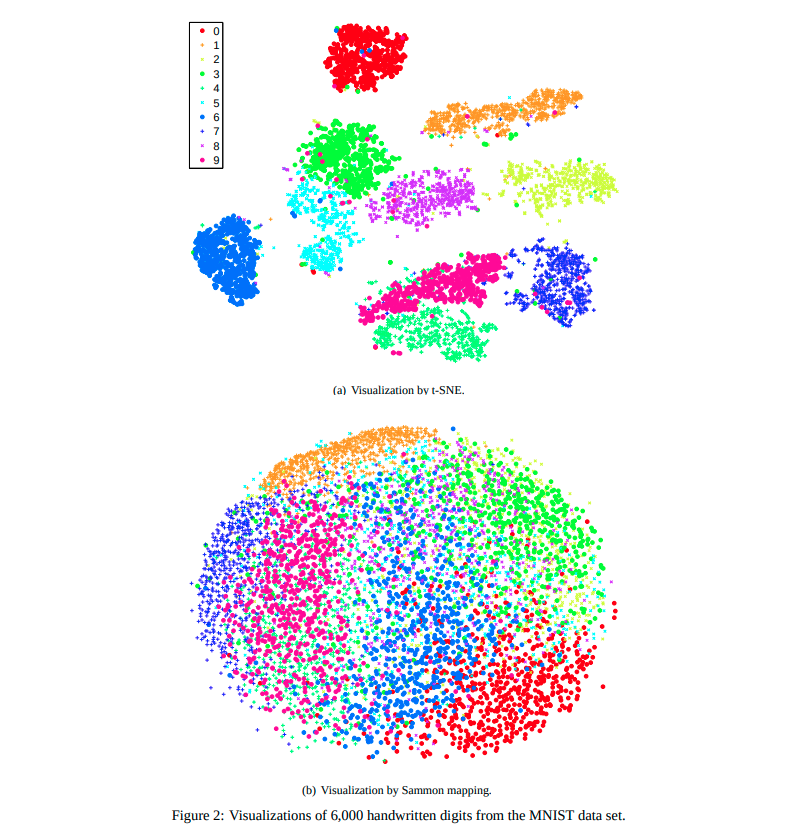

t-SNE has a tuneable parameter, **perplexity** which balances attention between the local and global aspects of your data. It is a guess about the number of close neighbors each point has. The perplexity value has a complex effect on the resulting pictures. The original paper says, “The performance of t-SNE is fairly robust to changes in the perplexity, and typical values are between 5 and 50.” But the story is more nuanced than that. Getting the most from t-SNE may mean analyzing multiple plots with different perplexities.

Also the t-SNE algorithm doesn’t always produce similar output on successive runs as there are additional hyperparameters related to the optimization process.

### HOW DOES T-SNE WORK??

The t-SNE algorithm calculates a similarity measure between pairs of instances in the high dimensional space and in the low dimensional space. It then tries to optimize these two similarity measures using a cost function. Let’s break that down into 3 basic steps.

1. Measure similarities between points in the high dimensional space. Think of a bunch of data points scattered on a 2D space. For each data point (xi) we’ll center a Gaussian distribution over that point. Then we measure the density of all points (xj) under that Gaussian distribution. Then renormalize for all points. This gives us a set of probabilities (Pij) for all points. Those probabilities are proportional to the similarities. All that means is, if data points x1 and x2 have equal values under this gaussian circle then their proportions and similarities are equal and hence you have local similarities in the structure of this high-dimensional space. The Gaussian distribution or circle can be manipulated using what’s called perplexity, which influences the variance of the distribution (circle size) and essentially the number of nearest neighbors.

2. This step is similar to step 1, but instead of using a Gaussian distribution we use a Student t-distribution with one degree of freedom, which is also known as the Cauchy distribution (See fig below). This gives us a second set of probabilities (Qij) in the low dimensional space. As you can see the Student t-distribution has heavier tails than the normal distribution. The heavy tails allow for better modeling of far apart distances.

3. The last step is that we want these set of probabilities from the low-dimensional space (Qij) to reflect those of the high dimensional space (Pij) as best as possible. We want the two map structures to be similar. We measure the difference between the probability distributions of the two-dimensional spaces using Kullback-Liebler divergence (KL). Finally, we use gradient descent to minimize our KL cost function.

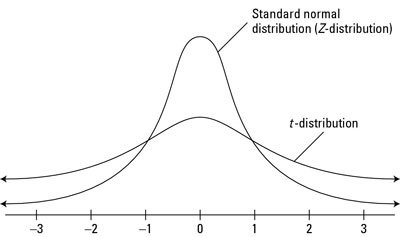

Scikit-learn has an implementation of t-SNE available which provides a wide variety of tuning parameters for t-SNE, and the most notable ones are:

1. n_components (default: 2): Dimension of the embedded space.
2. perplexity (default: 30): The perplexity is related to the number of nearest neighbors that are used in other manifold learning algorithms. Consider selecting a value between 5 and 50.
3. n_iter (default: 1000): Maximum number of iterations for the optimization. Should be at least 250.
4. method (default: ‘barnes_hut’): Barnes-Hut approximation runs in O(NlogN) time. method=’exact’ will run on the slower, but exact, algorithm in O(N^2) time.

In [13]:
# numpy.
import numpy as np
from numpy import linalg
from numpy.linalg import norm
from scipy.spatial.distance import squareform, pdist

# sklearn.
import sklearn
from sklearn.manifold import TSNE
from sklearn.datasets import load_digits
from sklearn.preprocessing import scale

# Random state.
RS = 20150101

# matplotlib.
import matplotlib.pyplot as plt
import matplotlib.patheffects as PathEffects
import matplotlib
%matplotlib inline

# seaborn.
import seaborn as sns
sns.set_style('darkgrid')
sns.set_palette('muted')
sns.set_context("notebook", font_scale=1.5,
                rc={"lines.linewidth": 2.5})

1797 images each of size 8 x 8 loaded using load_digits()

In [14]:
digits = load_digits()
digits.data.shape

(1797, 64)

Printing some images from the dataset

---



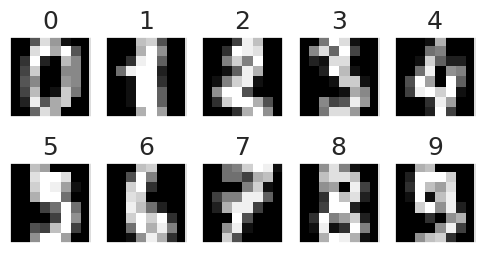

In [15]:
nrows, ncols = 2, 5
plt.figure(figsize=(6,3))
plt.gray()
for i in range(ncols * nrows):
    ax = plt.subplot(nrows, ncols, i + 1)
    ax.matshow(digits.images[i,...])
    plt.xticks([]); plt.yticks([])
    plt.title(digits.target[i])

In [16]:
# We first reorder the data points according to the handwritten numbers.
X = np.vstack([digits.data[digits.target==i]
               for i in range(10)])
y = np.hstack([digits.target[digits.target==i]
               for i in range(10)])

## Now using TSNE to fit the dataset with the default values.


1. n_components : 2
2. perplexity : 30
3. n_iter : 1000
4. method : ‘barnes_hut’


---



In [17]:
digits_proj = TSNE(init="pca", random_state=RS).fit_transform(X)

#### Visualizing the data in the projected space

---



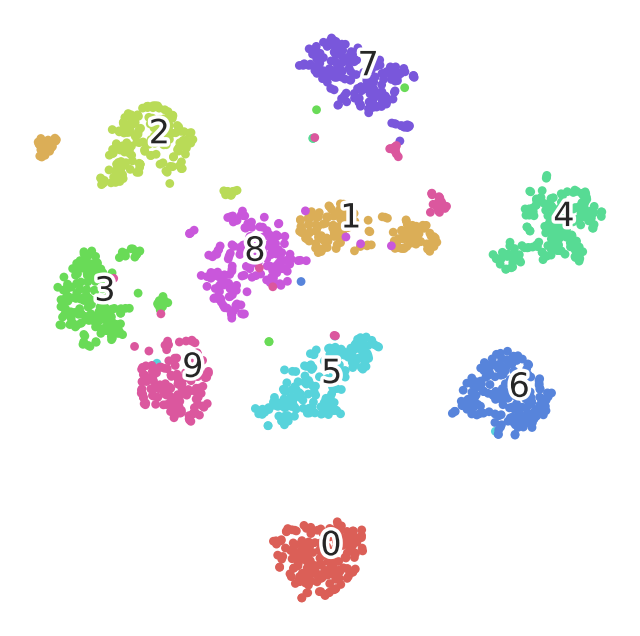

(<Figure size 800x800 with 1 Axes>,
 <Axes: >,
 <matplotlib.collections.PathCollection at 0x79bb08c5d610>)

In [18]:
def scatter(x, colors):
    # We choose a color palette with seaborn.
    palette = np.array(sns.color_palette("hls", 10))

    # We create a scatter plot.
    f = plt.figure(figsize=(8, 8))
    ax = plt.subplot(aspect='equal')
    sc = ax.scatter(x[:,0], x[:,1], lw=0, s=40,
                    c=palette[colors.astype(int)])
    plt.xlim(-25, 25)
    plt.ylim(-25, 25)
    ax.axis('off')
    ax.axis('tight')

    # We add the labels for each digit.
    txts = []
    for i in range(10):
        # Position of each label.
        xtext, ytext = np.median(x[colors == i, :], axis=0)
        txt = ax.text(xtext, ytext, str(i), fontsize=24)
        txt.set_path_effects([
            PathEffects.Stroke(linewidth=5, foreground="w"),
            PathEffects.Normal()])
        txts.append(txt)
    plt.show()

    return f, ax, sc

scatter(digits_proj, y)

# Tweaking some of the hyperparameters to better understand their role

---

### Changing the PERPLEXITY values


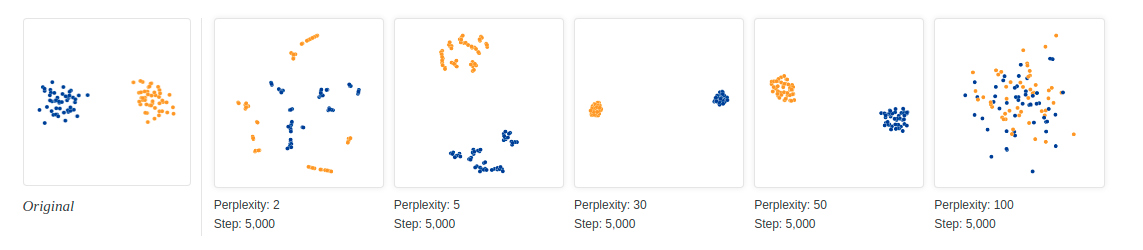

With perplexity values in the range (5 - 50) suggested by van der Maaten & Hinton, the diagrams do show these clusters, although with very different shapes. Outside that range, things get a little weird. With perplexity 2, local variations dominate. The image for perplexity 100, with merged clusters, illustrates a pitfall: for the algorithm to operate properly, the perplexity really should be smaller than the number of points. Implementations can give unexpected behavior otherwise.



---


1. n_components : 2
2. perplexity : **5**
3. n_iter : 1000
4. method : ‘barnes_hut’


---

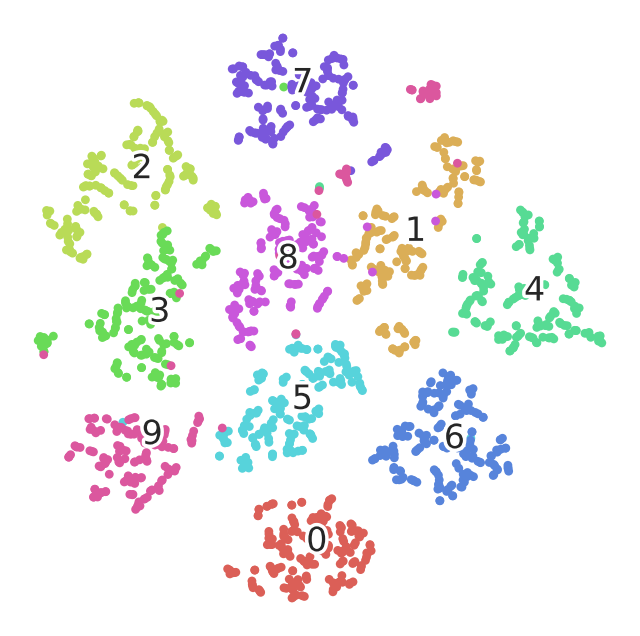

(<Figure size 800x800 with 1 Axes>,
 <Axes: >,
 <matplotlib.collections.PathCollection at 0x79bb08ac0710>)

In [19]:
digits_proj = TSNE(init="pca", random_state=RS, perplexity=5).fit_transform(X)

scatter(digits_proj, y)

We can see that there are local clusters within the same number group as well. This is happening as the perplexity being at 5, allows the local neighbourhood to dominate. Let us now see what happens if we increase the perplexity to 100, thereby increasing global impact.





---


1. n_components : 2
2. perplexity : **100**
3. n_iter : 1000
4. method : ‘barnes_hut’


---

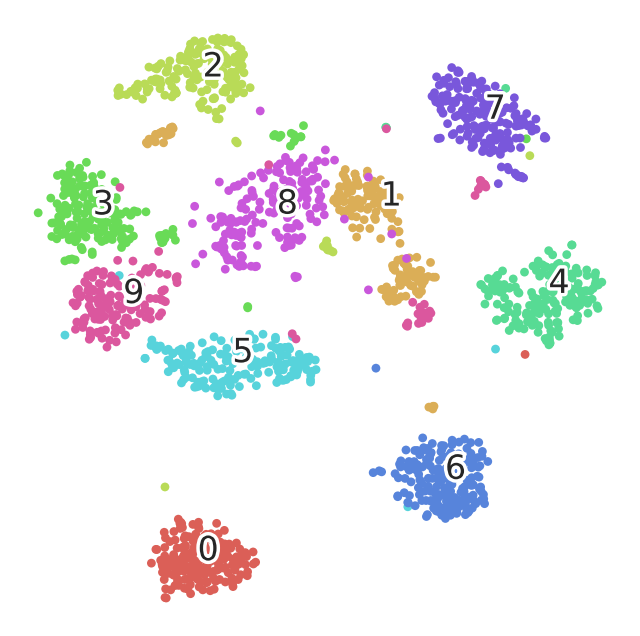

(<Figure size 800x800 with 1 Axes>,
 <Axes: >,
 <matplotlib.collections.PathCollection at 0x79bb08e59700>)

In [20]:
digits_proj = TSNE(init="pca", random_state=RS, perplexity=100).fit_transform(X)

scatter(digits_proj, y)

The general structure of the plot remained similar to the one with perplexity = 30 (default), but on careful observation you can observe many data points not being part of the group they are supposed to be in. This is because of the large number of points considered for the neighbourhood (as perplexity value = 100 is higher), thereby allowing 2 data points from different groups to end up closer.



---

### Changing the NUMBER OF ITERATIONS

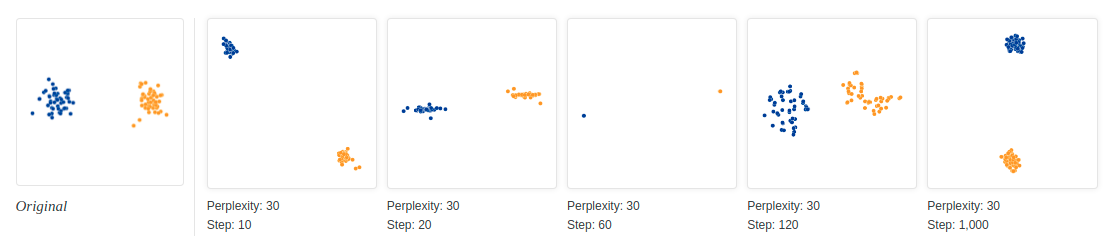

The images above show five different runs at perplexity 30. The first four were stopped before stability. After 10, 20, 60, and 120 steps you can see layouts with seeming 1-dimensional and even pointlike images of the clusters. If you see a t-SNE plot with strange “pinched” shapes, chances are the process was stopped too early. Unfortunately, there’s no fixed number of steps that yields a stable result. Different data sets can require different numbers of iterations to converge.

The most important thing is to iterate until reaching a stable configuration.





---


1. n_components : 2
2. perplexity : 30
3. n_iter : **250**
4. method : ‘barnes_hut’


---

/usr/local/lib/python3.12/dist-packages/sklearn/manifold/_t_sne.py:1164: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.5 and will be removed in 1.7.
  warnings.warn(


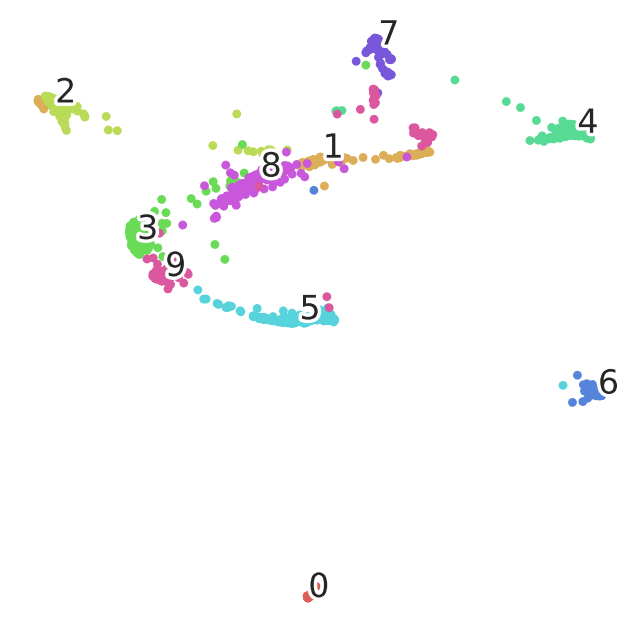

(<Figure size 800x800 with 1 Axes>,
 <Axes: >,
 <matplotlib.collections.PathCollection at 0x79bb08be0f20>)

In [21]:
digits_proj = TSNE(init="pca", random_state=RS, n_iter=250).fit_transform(X)

scatter(digits_proj, y)

As can be seen from the figure above, stopping the optimization earlier (in 250 iterations) resulted in a suboptimal clustering of the groups.

Let us now see how the results are affected if t-SNE is run for larger number of iterations


---


1. n_components : 2
2. perplexity : 30
3. n_iter : **5000**
4. method : ‘barnes_hut’


---

/usr/local/lib/python3.12/dist-packages/sklearn/manifold/_t_sne.py:1164: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.5 and will be removed in 1.7.
  warnings.warn(


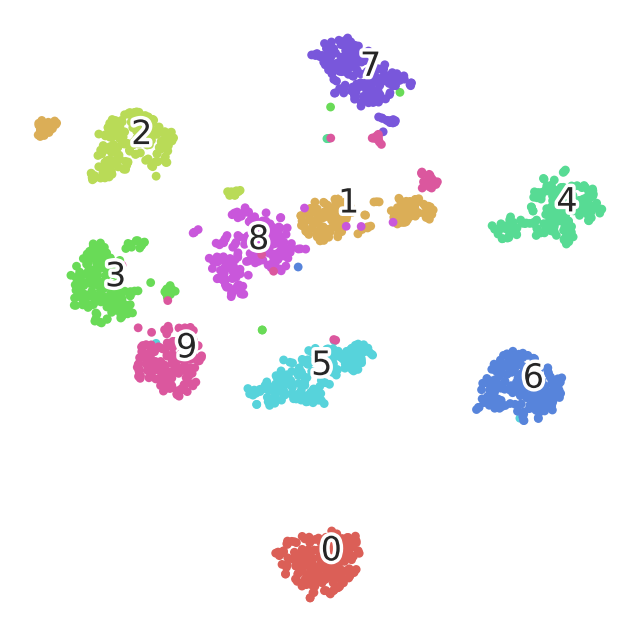

(<Figure size 800x800 with 1 Axes>,
 <Axes: >,
 <matplotlib.collections.PathCollection at 0x79bb089d2180>)

In [22]:
digits_proj = TSNE(init="pca", random_state=RS, n_iter=5000).fit_transform(X)

scatter(digits_proj, y)

Running for larger number of iterations more or less resulted in the same plot as the optimization had nearly converged till the default 1000 iterations. However the density of the clusters has increased.

---

### Changing the method to EXACT

The barnes-hut method takes O(NlogN) time, whereas the exact method takes O(N^2) time. Notice the increase in the execution time while running the cell below.


---

1. n_components : 2
2. perplexity : 30
3. n_iter : 1000
4. method : **‘exact’**


---

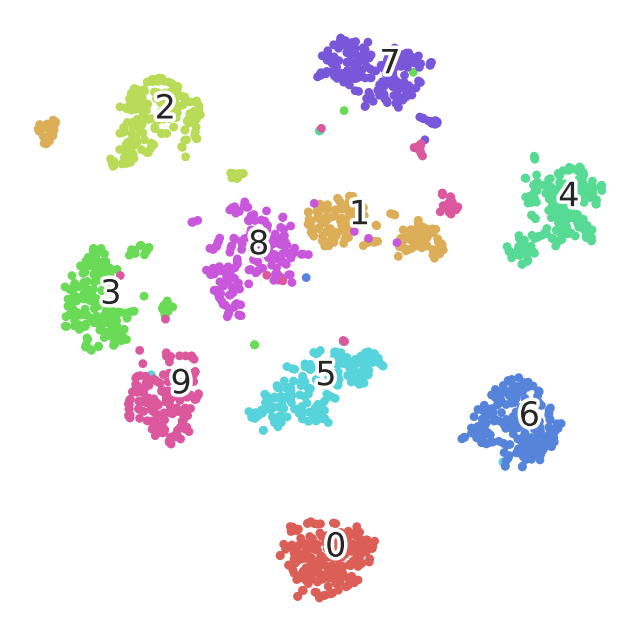

(<Figure size 800x800 with 1 Axes>,
 <Axes: >,
 <matplotlib.collections.PathCollection at 0x79bb089d0da0>)

In [23]:
digits_proj = TSNE(init="pca", random_state=RS, method='exact').fit_transform(X)

scatter(digits_proj, y)

## EXERCISE

---



Try out different perplexity and iteration values to better appreciate the concepts taught.

You can modify the code in the cell below to check the resultant plots.

/usr/local/lib/python3.12/dist-packages/sklearn/manifold/_t_sne.py:1164: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.5 and will be removed in 1.7.
  warnings.warn(


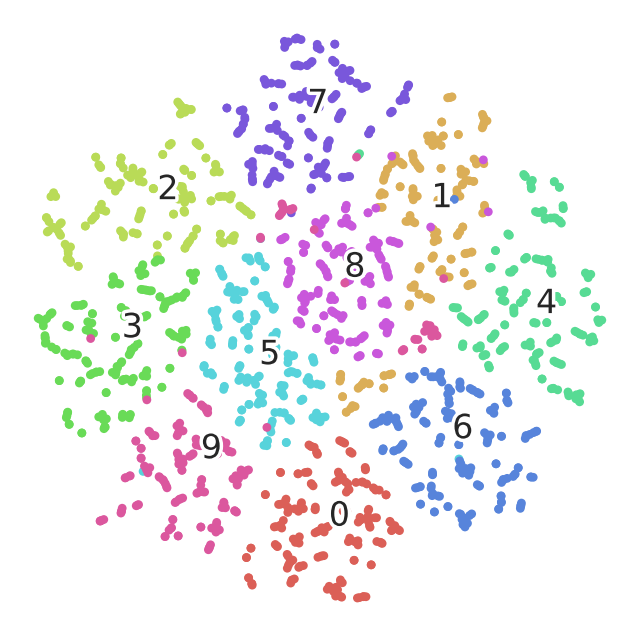

/usr/local/lib/python3.12/dist-packages/sklearn/manifold/_t_sne.py:1164: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.5 and will be removed in 1.7.
  warnings.warn(


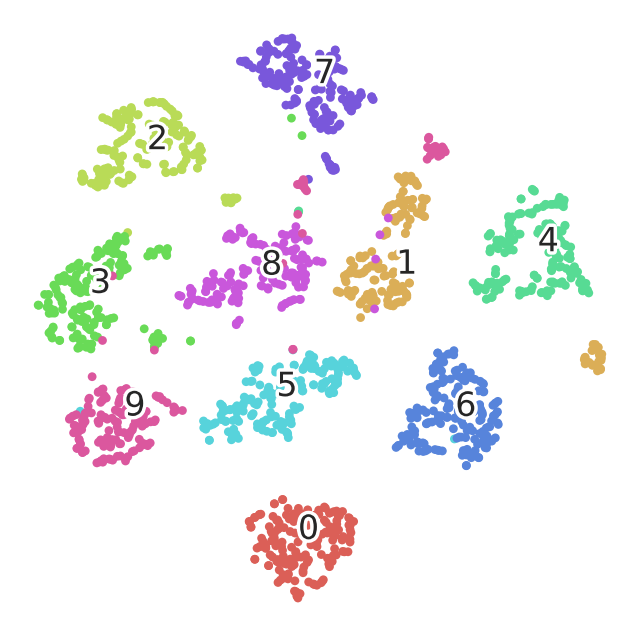

/usr/local/lib/python3.12/dist-packages/sklearn/manifold/_t_sne.py:1164: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.5 and will be removed in 1.7.
  warnings.warn(


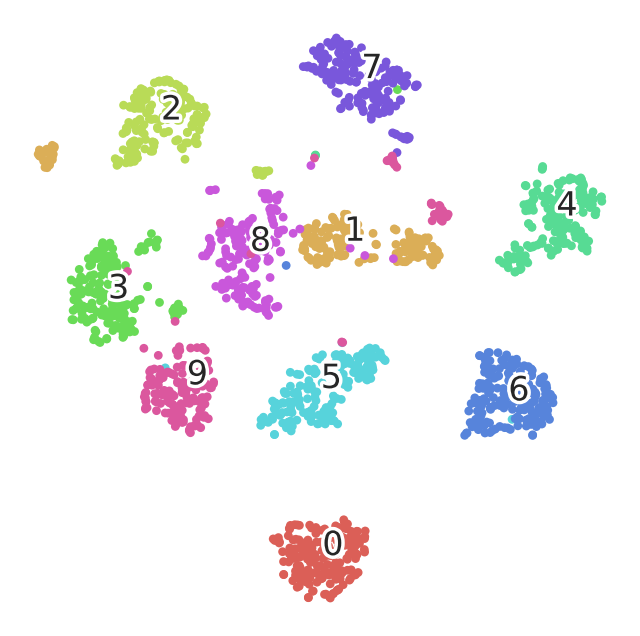

/usr/local/lib/python3.12/dist-packages/sklearn/manifold/_t_sne.py:1164: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.5 and will be removed in 1.7.
  warnings.warn(


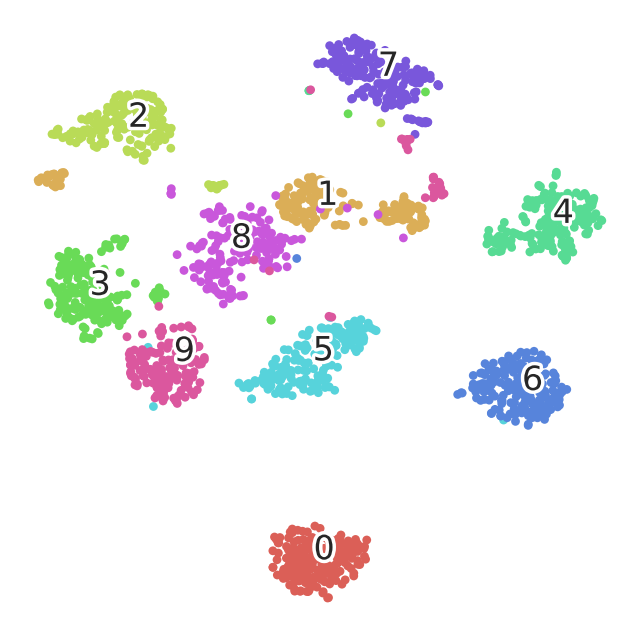

/usr/local/lib/python3.12/dist-packages/sklearn/manifold/_t_sne.py:1164: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.5 and will be removed in 1.7.
  warnings.warn(


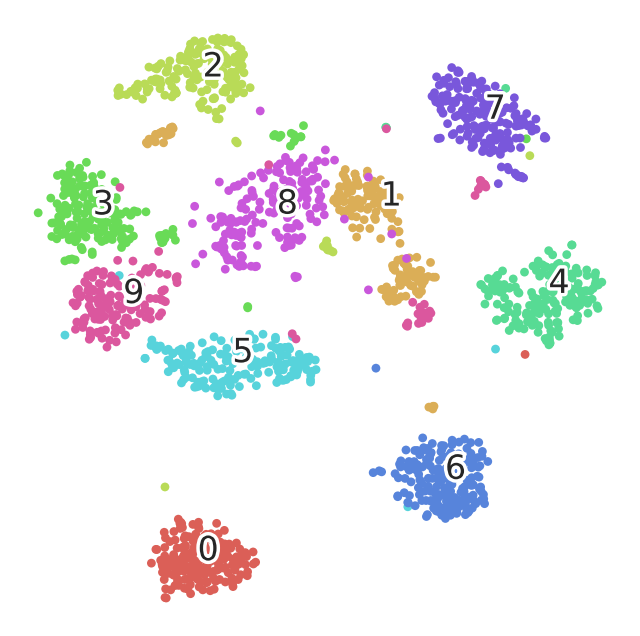

/usr/local/lib/python3.12/dist-packages/sklearn/manifold/_t_sne.py:1164: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.5 and will be removed in 1.7.
  warnings.warn(


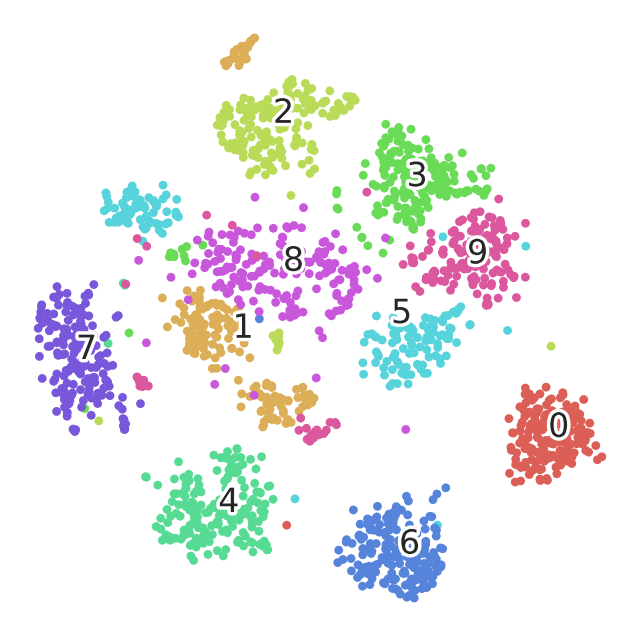

(<Figure size 800x800 with 1 Axes>,
 <Axes: >,
 <matplotlib.collections.PathCollection at 0x79bb0ebe9700>)

In [25]:
perplexity_value = 2
number_iterations = 1000
method = "barnes_hut"

digits_proj = TSNE(init="pca", random_state=RS, n_iter=number_iterations, perplexity=perplexity_value, method=method).fit_transform(X)
scatter(digits_proj, y)

perplexity_value = 10
number_iterations = 1000
method = "barnes_hut"

digits_proj = TSNE(init="pca", random_state=RS, n_iter=number_iterations, perplexity=perplexity_value, method=method).fit_transform(X)
scatter(digits_proj, y)

perplexity_value = 25
number_iterations = 1000
method = "barnes_hut"

digits_proj = TSNE(init="pca", random_state=RS, n_iter=number_iterations, perplexity=perplexity_value, method=method).fit_transform(X)
scatter(digits_proj, y)

perplexity_value = 50
number_iterations = 1000
method = "barnes_hut"

digits_proj = TSNE(init="pca", random_state=RS, n_iter=number_iterations, perplexity=perplexity_value, method=method).fit_transform(X)
scatter(digits_proj, y)

perplexity_value = 100
number_iterations = 1000
method = "barnes_hut"

digits_proj = TSNE(init="pca", random_state=RS, n_iter=number_iterations, perplexity=perplexity_value, method=method).fit_transform(X)
scatter(digits_proj, y)

perplexity_value = 200
number_iterations = 1000
method = "barnes_hut"

digits_proj = TSNE(init="pca", random_state=RS, n_iter=number_iterations, perplexity=perplexity_value, method=method).fit_transform(X)
scatter(digits_proj, y)

/usr/local/lib/python3.12/dist-packages/sklearn/manifold/_t_sne.py:1164: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.5 and will be removed in 1.7.
  warnings.warn(


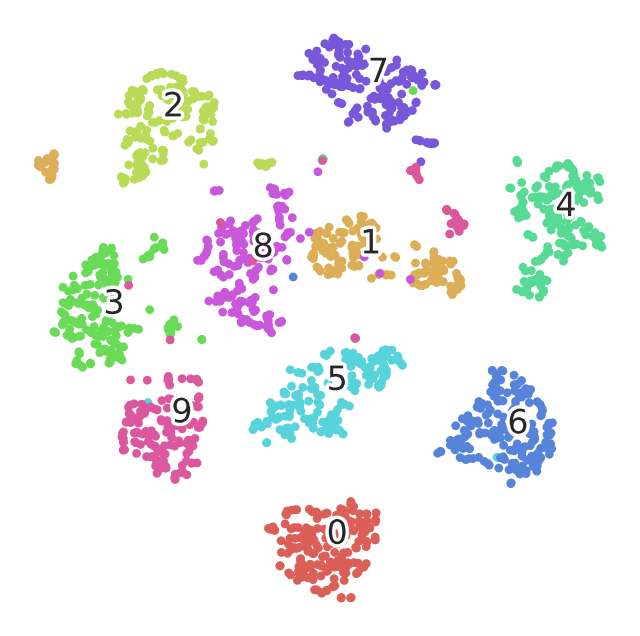

/usr/local/lib/python3.12/dist-packages/sklearn/manifold/_t_sne.py:1164: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.5 and will be removed in 1.7.
  warnings.warn(


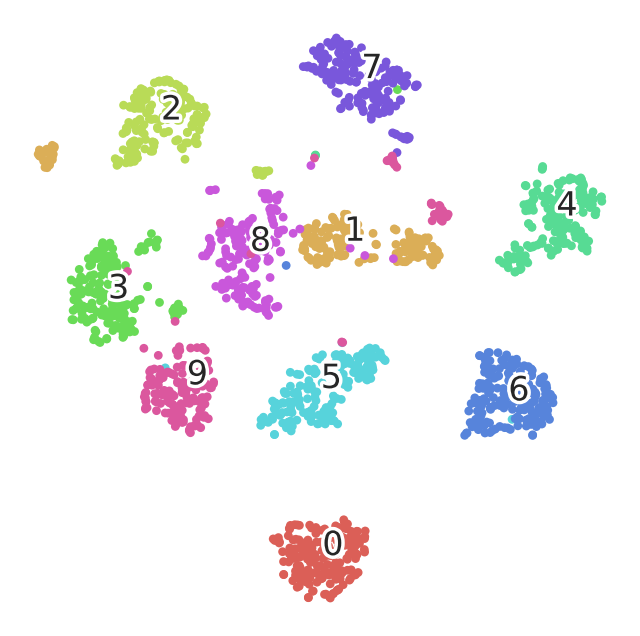

/usr/local/lib/python3.12/dist-packages/sklearn/manifold/_t_sne.py:1164: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.5 and will be removed in 1.7.
  warnings.warn(


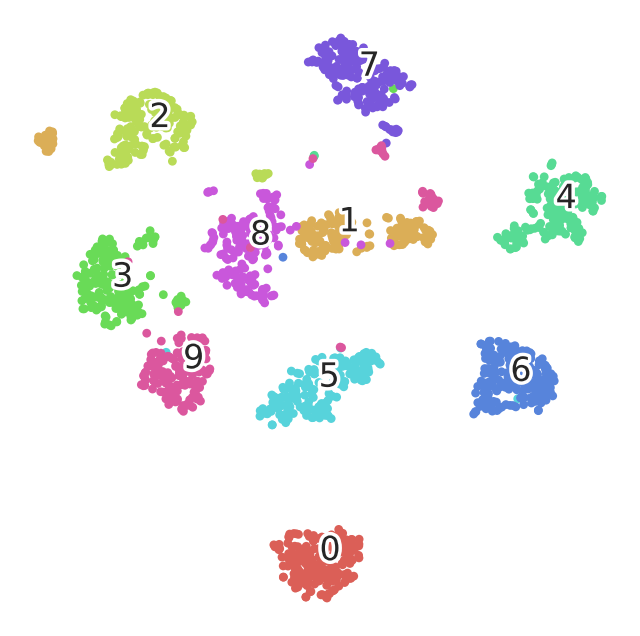

/usr/local/lib/python3.12/dist-packages/sklearn/manifold/_t_sne.py:1164: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.5 and will be removed in 1.7.
  warnings.warn(


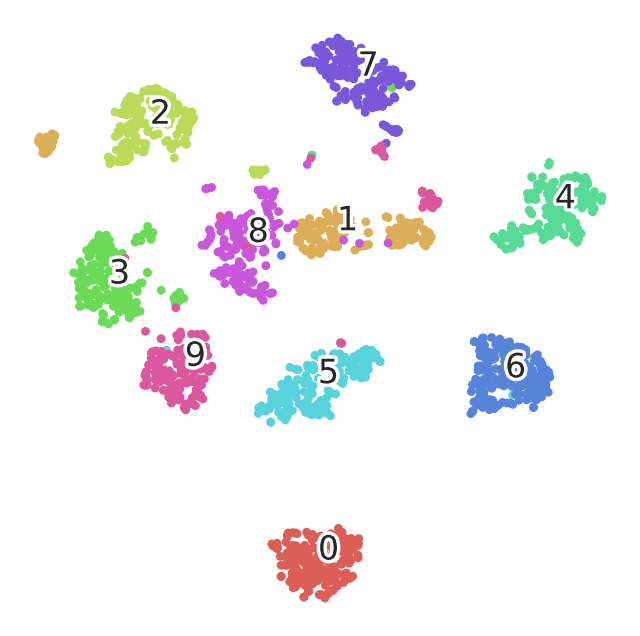

(<Figure size 800x800 with 1 Axes>,
 <Axes: >,
 <matplotlib.collections.PathCollection at 0x79bb0ecb23c0>)

In [27]:
perplexity_value = 25
number_iterations = 500
method = "barnes_hut"

digits_proj = TSNE(init="pca", random_state=RS, n_iter=number_iterations, perplexity=perplexity_value, method=method).fit_transform(X)
scatter(digits_proj, y)

perplexity_value = 25
number_iterations = 1000
method = "barnes_hut"

digits_proj = TSNE(init="pca", random_state=RS, n_iter=number_iterations, perplexity=perplexity_value, method=method).fit_transform(X)
scatter(digits_proj, y)

perplexity_value = 25
number_iterations = 2500
method = "barnes_hut"

digits_proj = TSNE(init="pca", random_state=RS, n_iter=number_iterations, perplexity=perplexity_value, method=method).fit_transform(X)
scatter(digits_proj, y)


perplexity_value = 25
number_iterations = 2000
method = "barnes_hut"

digits_proj = TSNE(init="pca", random_state=RS, n_iter=number_iterations, perplexity=perplexity_value, method=method).fit_transform(X)
scatter(digits_proj, y)


## Analysis of t-SNE Hyperparameter Tuning

### 1. Analysis of Perplexity Values

The  key hyperparameter is **perplexity** , which is an estimate of the number of close neighbors for each point and balances the attention given to local versus global aspects of the data.

| Perplexity Value (Tested: 2, 5, 10, 25, 30 (Default), 50, 100, 200) | Resulting Visualization Effect | Informational Conclusion |
| :--- | :--- | :--- |
| **Low Perplexity (e.g., 2, 5)** | Local variations dominate. The resulting clusters are often fragmented or sparse, showing smaller, local clusters within the same digit group. | Highly focused on **local neighborhood structure**; often results in poor visualization of the overall data structure. |
| **Optimal/Recommended Range (e.g., 10, 25, 30, 50)** | Produces clear, well-separated clusters, though the shapes vary.$\text{Perplexity} = 30$ is the default and provides a clear representation of the 10 distinct digit classes. | Provides a good balance between preserving local and global structure. The performance is generally robust within the recommended range of **5 to 50**. |
| **High Perplexity (e.g., 100, 200)**  | Clusters begin to merge, and data points from different groups can end up closer together. For high values, the perplexity should ideally be smaller than the total number of data points for the algorithm to operate properly. | Allows the neighborhood calculation to consider too many points, increasing the **global influence** and leading to merged or distorted clusters. |

***

### 2. Analysis of Number of Iterations ($\mathbf{n\_iter}$)

The number of iterations ($n\_iter$) determines how long the gradient descent optimization runs to minimize the Kullback-Liebler divergence cost function. The default value is 1000.

| $\mathbf{n\_iter}$ Value (Tested: 250, 500, 1000, 2500, 5000) | Resulting Visualization Effect | Informational Conclusion |
| :--- | :--- | :--- |
| **Too Few Iterations (e.g., 250)**  | Results in suboptimal clustering, often exhibiting strange **"pinched" shapes** or non-stable configurations. The clusters may not be fully separated. | The optimization process was stopped too early before reaching a stable configuration. The algorithm requires at least 250 iterations. |
| **Sufficient Iterations (e.g., 1000)**  | Provides a stable, well-clustered visualization for the digits dataset. | A stable configuration is reached, allowing for clear cluster separation. |
| **Excessive Iterations (e.g., 5000)**  | The resulting plot is generally similar to the result from 1000 iterations, indicating that the optimization had already converged . The density of the clusters may appear increased. | Running beyond the point of convergence does not significantly improve the cluster structure but may increase computational time unnecessarily. |



---

## Exercise:

1. Now that you understand t-SNE a bit better, can you point out some differences between PCA and t-SNE. What are the advantages/disadvantages of one over the other?


>##### Pointers:

> a. Which of the two algorithms is linear and which one is non-linear?    
b. How does the non-linearity in one of these two algorithms help in capturing certain data sets?    
c. PCA is known to keep points which were further apart in the higher dimension, far apart in the lower dimension as well. Does t-SNE do the same? Or does it try to preserve local neighbourhood?    
d. Can you comment on which one of the two is computationally more expensive?

2. How does the computational complexity and runtime of t-SNE scale with dataset size and dimensionality?

3. What are some limitations or potential pitfalls to be aware of when using t-SNE? (tell atleast 3)


## Differences Between PCA and t-SNE, and Comparison of Advantages/Disadvantages

Here are the key differences and comparisons between Principal Component Analysis (PCA) and t-Distributed Stochastic Neighbor Embedding (t-SNE):

| Feature | PCA (Principal Component Analysis) | t-SNE (t-Distributed Stochastic Neighbor Embedding) |
| :--- | :--- | :--- |
| **Linearity** |**Linear** algorithm  | **Non-linear** technique  |
| **Goal** | Focuses on preserving the **global structure** of the data. | Primarily used for data exploration and visualizing high-dimensional data by focusing on preserving **local structure**. |
| **Non-linearity Advantage** | N/A | Non-linearity allows t-SNE to capture **non-linear relationships** and intrinsic manifold structures within the data, which is useful for datasets where clusters are not separable by a plane. |
| **Distance Preservation** | Preserves large pairwise distances; points far apart in the higher dimension remain far apart in the lower dimension. | Primarily focuses on preserving the **local neighborhood structure** (local similarities). The non-linear mapping makes the distance between far-apart points in the low-dimensional space less meaningful than in PCA. |
| **Computational Complexity (Standard/Exact)** | Generally faster and scales better with dataset size. | **More computationally expensive** . The exact method runs in $O(N^2)$ time, where $N$ is the number of points. |
| **Global Structure Preservation** | High  | Low (can distort global distances)  |
| **Implementation Complexity** | Simple, fewer hyper-parameters. | More complex, with tuneable parameters like **perplexity** and **number of iterations** that significantly impact the results. |

***

## Computational Complexity and Runtime of t-SNE

The computational complexity and runtime of t-SNE scale differently depending on the method used:

* **Exact Method:** The exact algorithm for t-SNE has a time complexity of **$O(N^2)$**, where $N$ is the number of data points.
    * This complexity arises because the algorithm calculates a similarity measure between **all pairs** of instances in both the high-dimensional and low-dimensional spaces.
    * The runtime increase is noticeable when running the exact method.
* **Barnes-Hut Method:** The Barnes-Hut approximation method is an optimized approach to improve efficiency and runs in **$O(N \log N)$** time.
    * This is the default method in the scikit-learn implementation and is preferred for larger datasets.

***

## Limitations and Potential Pitfalls of t-SNE

At least three limitations or potential pitfalls when using t-SNE are:

1.  **Sensitivity to Hyperparameters (Perplexity and Iterations):**
    * The resulting visualization is highly dependent on the **perplexity** value, which balances attention between local and global data aspects. Analyzing multiple plots with different perplexities is often necessary . Typical values are between 5 and 50. *The optimization process requires a sufficient **number of iterations** to converge to a stable configuration.Stopping too early (e.g., before 250 iterations) can result in suboptimal clustering or strange "pinched" shapes in the plot.
2.  **Lack of Similar Output on Successive Runs:**
    * The t-SNE algorithm does not always produce similar output on successive runs due to additional hyperparameters related to the optimization process, such as `random_state`.
3.  **Distortion of Global Structure and Distances:**
    * t-SNE is designed to preserve **local neighborhood structure** (local similarities). As a result, the distance between clusters in the low-dimensional plot may not accurately reflect the difference or distance between them in the original high-dimensional space.
    * The meaning of the space between clusters is not as reliable as the tightness and shape of the clusters themselves.



---
 ## Some interesting references:

 1. https://blog.paperspace.com/dimension-reduction-with-t-sne/
 2. https://towardsdatascience.com/an-introduction-to-t-sne-with-python-example-5a3a293108d1
 3. https://distill.pub/2016/misread-tsne/



---


